In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

file_path = r'C:\Users\reshm\Documents\Daily Climate time series data\DailyDelhiClimateTest.csv'

data = pd.read_csv(file_path)

data.head() 



,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [8]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

print(missing_values)


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [9]:
# Print the data types of all columns
print(data.dtypes)


date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object


In [10]:
print(data.columns)


Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


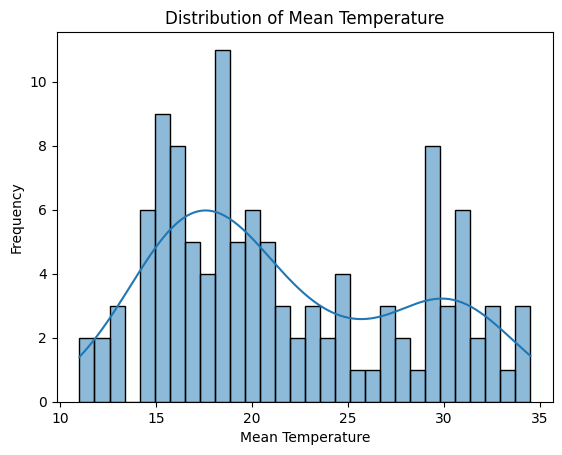

In [11]:

# Load the CSV file
file_path = r'C:\Users\reshm\Documents\Daily Climate time series data\DailyDelhiClimateTest.csv'
data = pd.read_csv(file_path)

# Plot the distribution of the 'meantemp' column
sns.histplot(data['meantemp'], kde=True, bins=30)  # kde adds the density curve
plt.title('Distribution of Mean Temperature')
plt.xlabel('Mean Temperature')
plt.ylabel('Frequency')
plt.show()

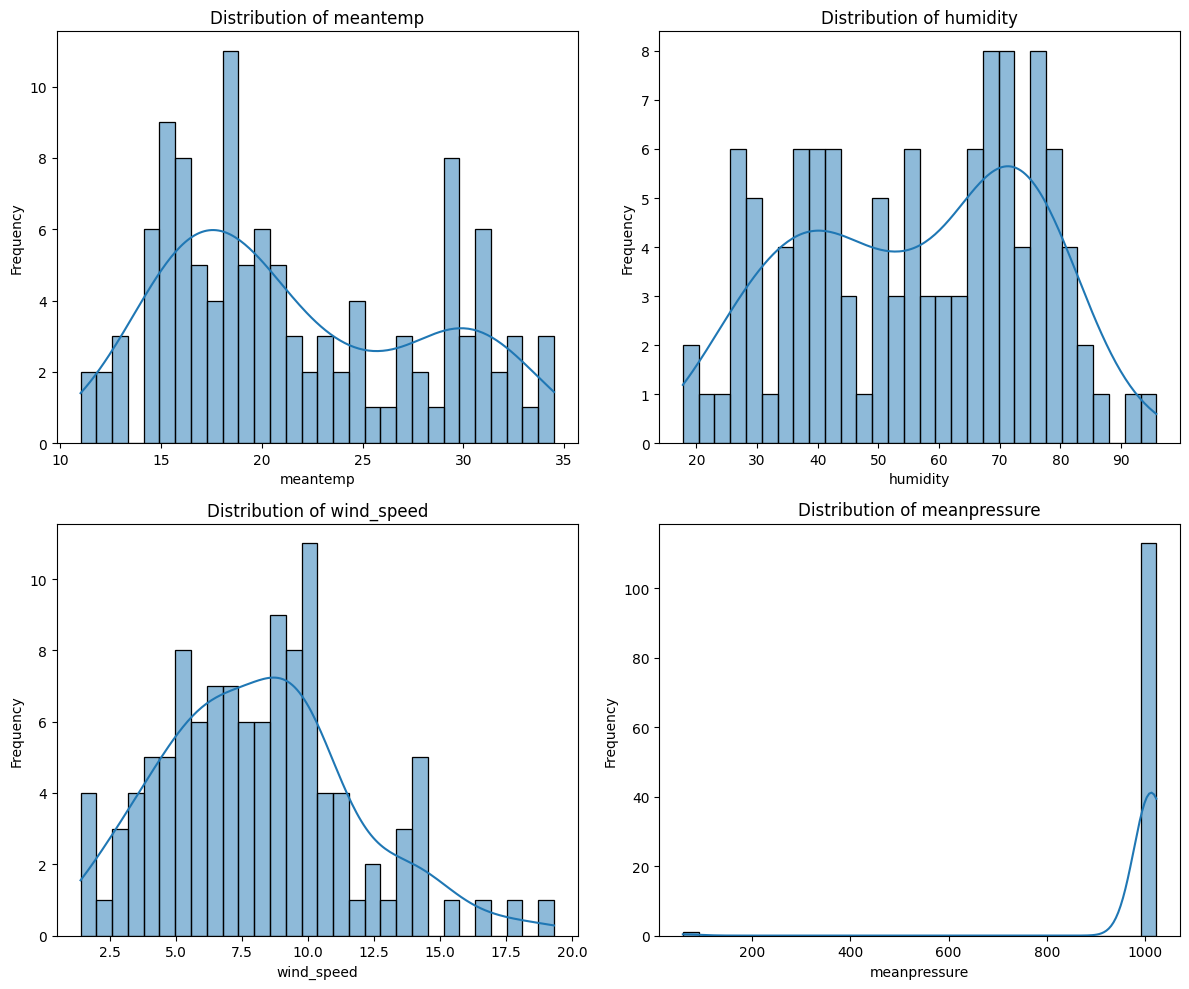

In [12]:

# List of columns to plot
columns_to_plot = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Create subplots: 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array to easily index

# Loop through the columns and plot the distribution for each
for i, col in enumerate(columns_to_plot):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


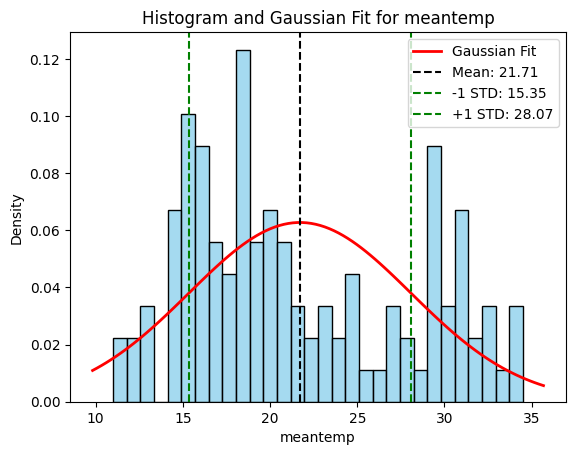

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Column to plot
column_to_plot = 'meantemp'  # Replace with the appropriate column name

# Compute the mean and standard deviation
mean = data[column_to_plot].mean()
std = data[column_to_plot].std()

# Plot the histogram with KDE (Kernel Density Estimate)
sns.histplot(data[column_to_plot], kde=False, bins=30, color='skyblue', stat='density')

# Overlay the Gaussian distribution
xmin, xmax = plt.xlim()  # Get the limits of the x-axis
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)  # Probability density function of a normal distribution
plt.plot(x, p, 'r', linewidth=2, label='Gaussian Fit')

# Plot mean line
plt.axvline(mean, color='k', linestyle='--', label=f'Mean: {mean:.2f}')

# Plot standard deviation lines
plt.axvline(mean - std, color='g', linestyle='--', label=f'-1 STD: {mean - std:.2f}')
plt.axvline(mean + std, color='g', linestyle='--', label=f'+1 STD: {mean + std:.2f}')

# Add labels and title
plt.title(f'Histogram and Gaussian Fit for {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


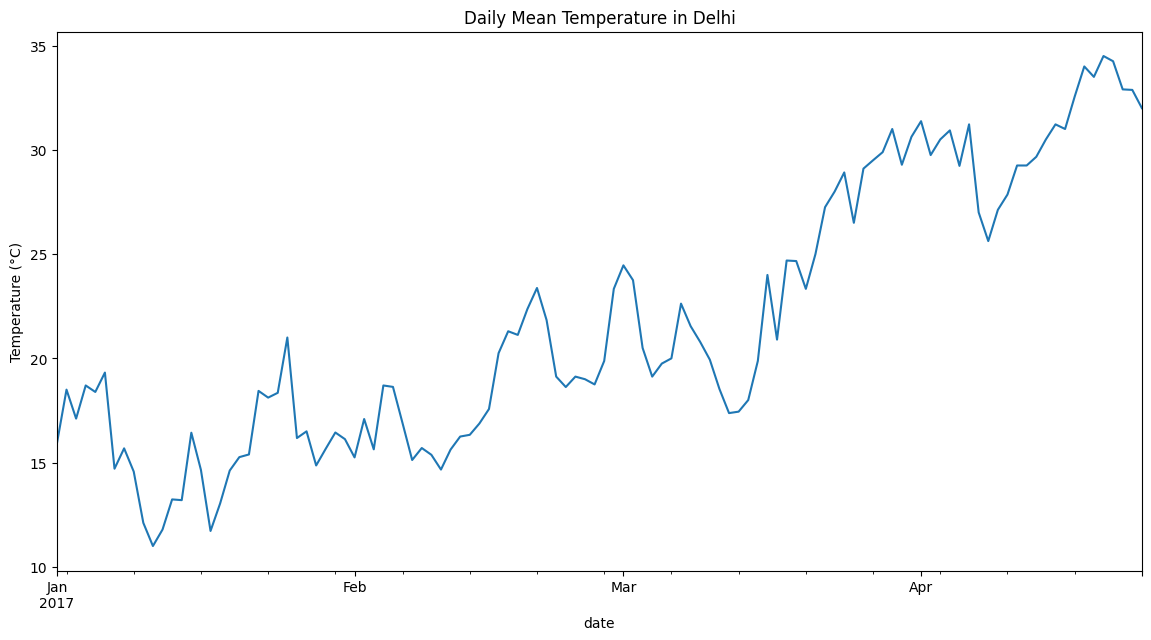

In [14]:

file_path = r'C:\Users\reshm\Documents\Daily Climate time series data\DailyDelhiClimateTest.csv'
data = pd.read_csv(file_path)

# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index
data.set_index('date', inplace=True)

# Plot the time series data
plt.figure(figsize=(14, 7))
data['meantemp'].plot(title='Daily Mean Temperature in Delhi', ylabel='Temperature (°C)')
plt.show()


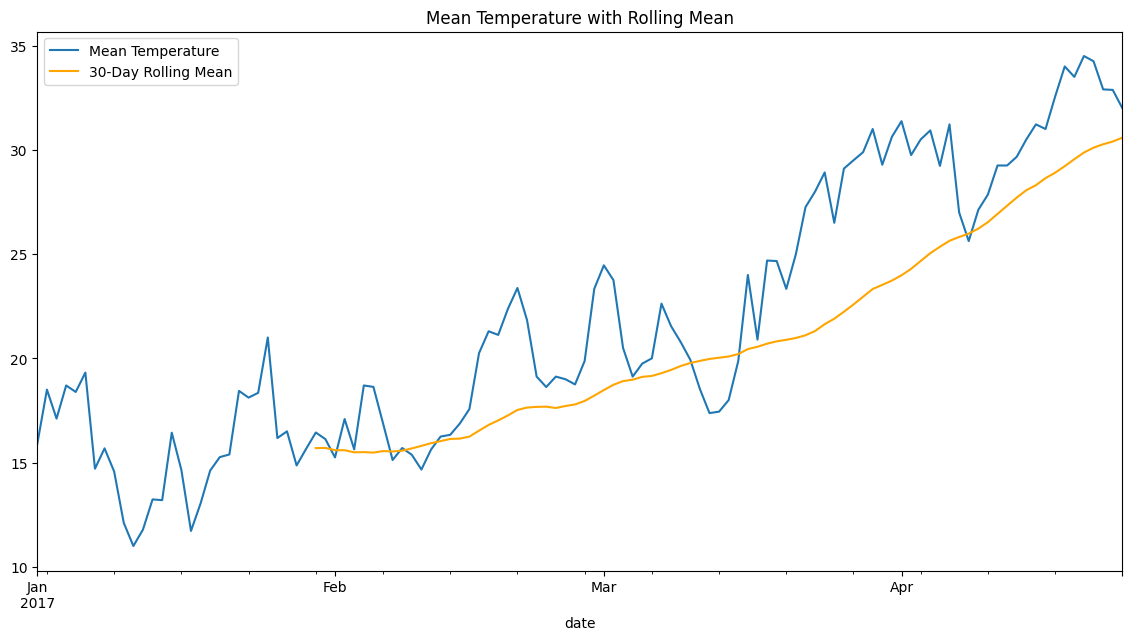

In [21]:
# Calculate rolling mean to identify trends
data['rolling_mean'] = data['meantemp'].rolling(window=30).mean()

# Plot the mean temperature and its rolling mean
plt.figure(figsize=(14, 7))
data['meantemp'].plot(label='Mean Temperature')
data['rolling_mean'].plot(label='30-Day Rolling Mean', color='orange')
plt.title('Mean Temperature with Rolling Mean')
plt.legend()
plt.show()




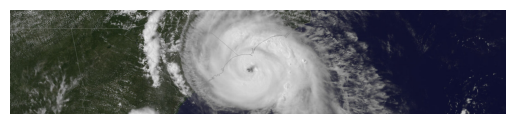

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image (correct the path with raw string)
image_path = r'C:\Users\reshm\Documents\Daily Climate time series data\climate time series data.jpg' 
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [19]:
from PIL import Image

# Load the image
image_path = r'C:\Users\reshm\Documents\Daily Climate time series data\climate time series data.jpg' 
img = Image.open(image_path)

# Resize the image
img_resized = img.resize((800, 600))  # Resize to 800x600
img_resized.show()

# Convert to grayscale
img_gray = img.convert('L')
img_gray.show()


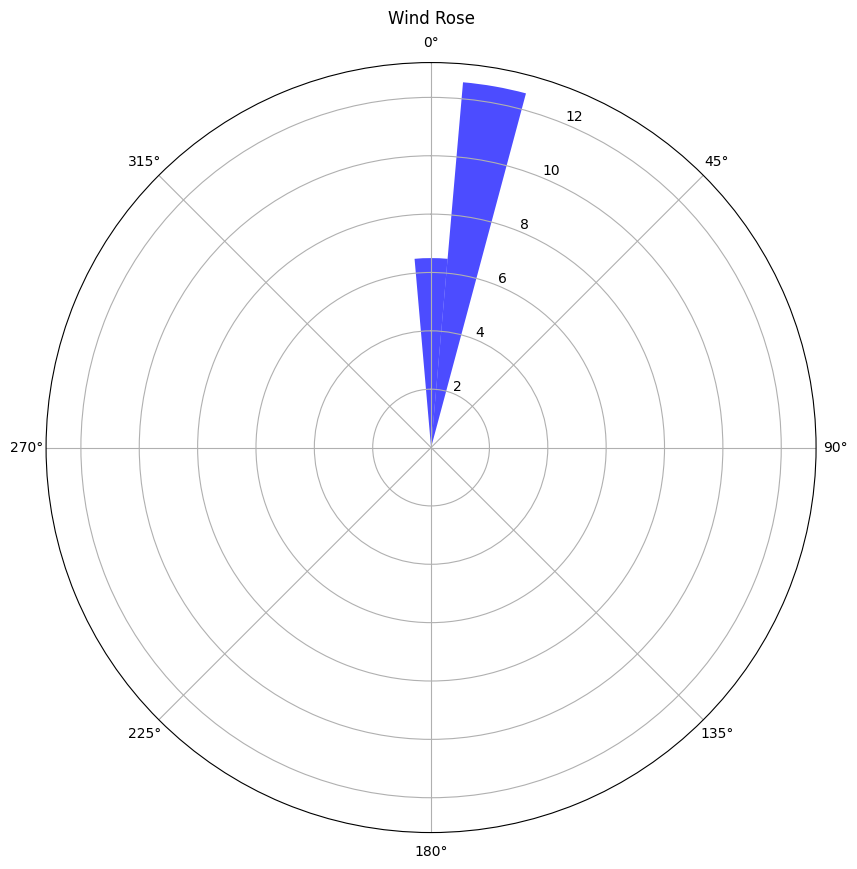

In [3]:

# Load your dataset
file_path = r'C:\Users\reshm\Documents\Daily Climate time series data\DailyDelhiClimateTest.csv'
data = pd.read_csv(file_path)

# Assuming the dataset has 'wind_speed' (in m/s) and 'wind_direction' (in degrees) columns
wind_direction = data['wind_speed']  # Replace with the correct column name for wind speed
wind_speed = data['wind_speed']  # Replace with the correct column name for wind direction

# Create wind rose
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

# Create a histogram for wind speed and direction
# Number of bins for wind direction (360 degrees, hence 36 bins for 10-degree intervals)
num_bins = 36
direction_bins = np.linspace(0, 360, num_bins + 1)  # 0 to 360 degrees

# Calculate wind speed in each direction bin
wind_speed_means = []
for i in range(num_bins):
    # Select data in the current direction bin
    wind_speed_bin = wind_speed[(wind_direction >= direction_bins[i]) & 
                                 (wind_direction < direction_bins[i+1])]
    # Calculate the average wind speed for the bin
    wind_speed_means.append(np.mean(wind_speed_bin) if len(wind_speed_bin) > 0 else 0)

# Create the wind rose
bars = ax.bar(np.deg2rad(direction_bins[:-1]), wind_speed_means, width=np.deg2rad(10), color='blue', alpha=0.7)


ax.set_title('Wind Rose', va='bottom')
ax.set_theta_zero_location('N')  # Set the 0 degrees (North) at the top
ax.set_theta_direction(-1)  # Clockwise direction
plt.show()


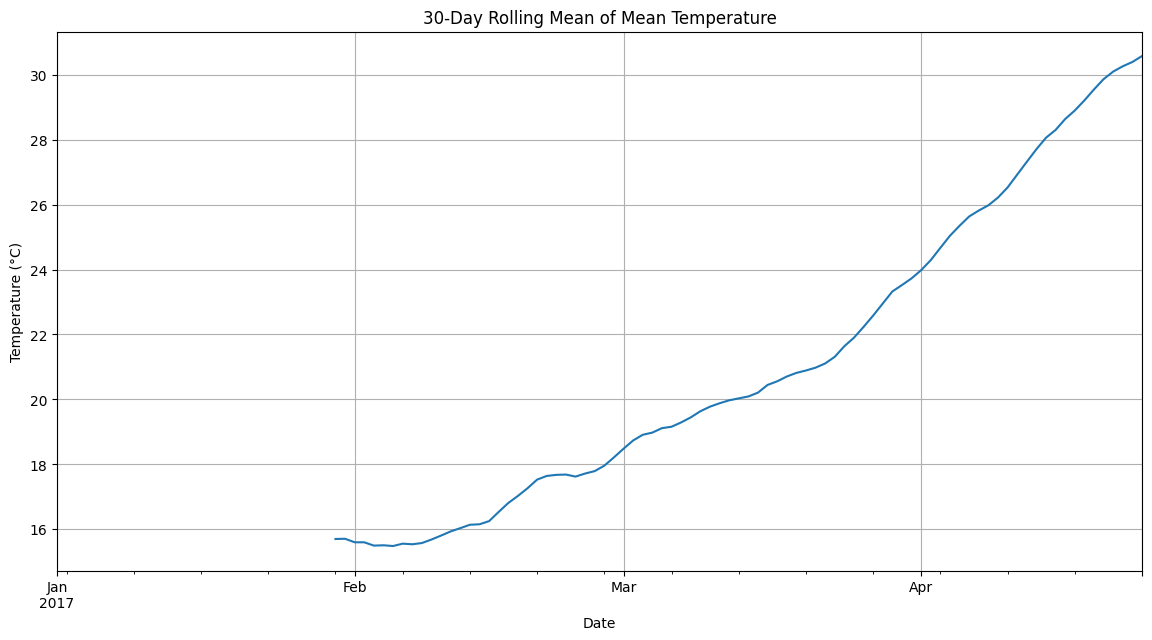

In [37]:

file_path = r'C:\Users\reshm\Documents\Daily Climate time series data\DailyDelhiClimateTest.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data['date'])

data.set_index('date', inplace=True)

# Apply rolling mean with a window size of 30 days
rolling_mean = data['meantemp'].rolling(window=30).mean()

# Plot the rolling mean
plt.figure(figsize=(14, 7))
rolling_mean.plot(title='30-Day Rolling Mean of Mean Temperature', ylabel='Temperature (°C)')
plt.xlabel('Date')
plt.grid()
plt.show()


<Figure size 1800x1000 with 0 Axes>

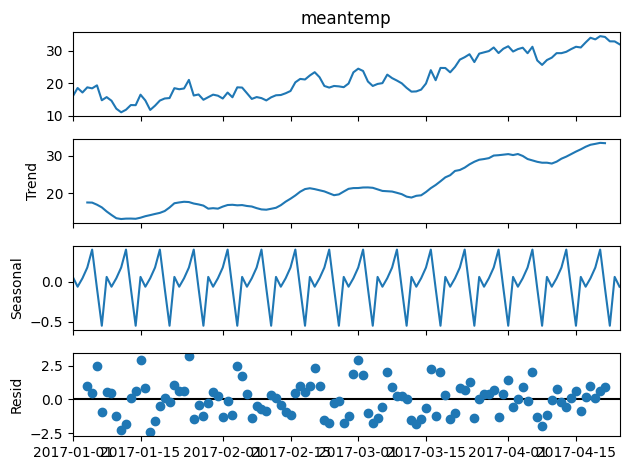

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
decomposition = seasonal_decompose(data['meantemp'], model='additive')

# Plot the decomposition
plt.figure(figsize=(18, 10))
decomposition.plot()
plt.show()


<Figure size 1400x700 with 0 Axes>

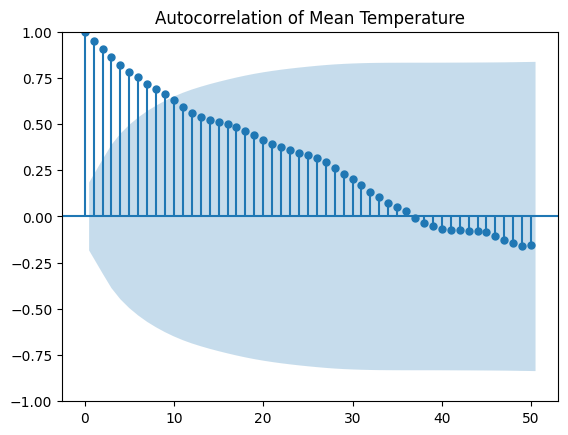

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function
plt.figure(figsize=(14, 7))
plot_acf(data['meantemp'], lags=50)
plt.title('Autocorrelation of Mean Temperature')
plt.show()


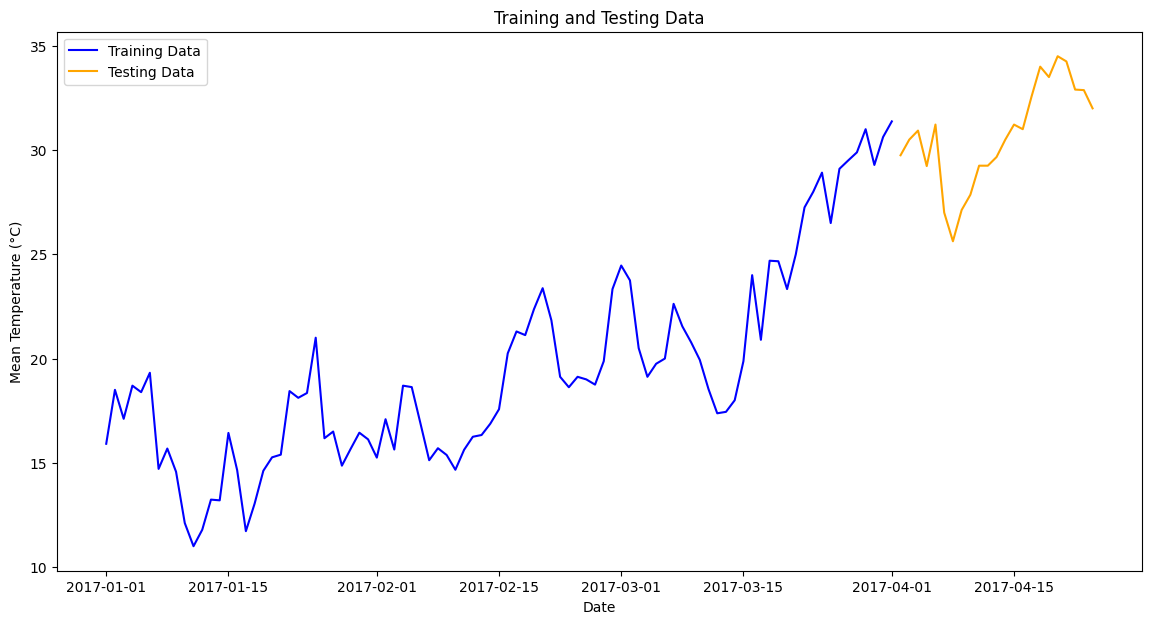

In [46]:

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = r'C:\Users\reshm\Documents\Daily Climate time series data\DailyDelhiClimateTest.csv'
data = pd.read_csv(file_path)

# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Plot the training and testing data
plt.figure(figsize=(14, 7))
plt.plot(train['meantemp'], label='Training Data', color='blue')
plt.plot(test['meantemp'], label='Testing Data', color='orange')
plt.title('Training and Testing Data')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()


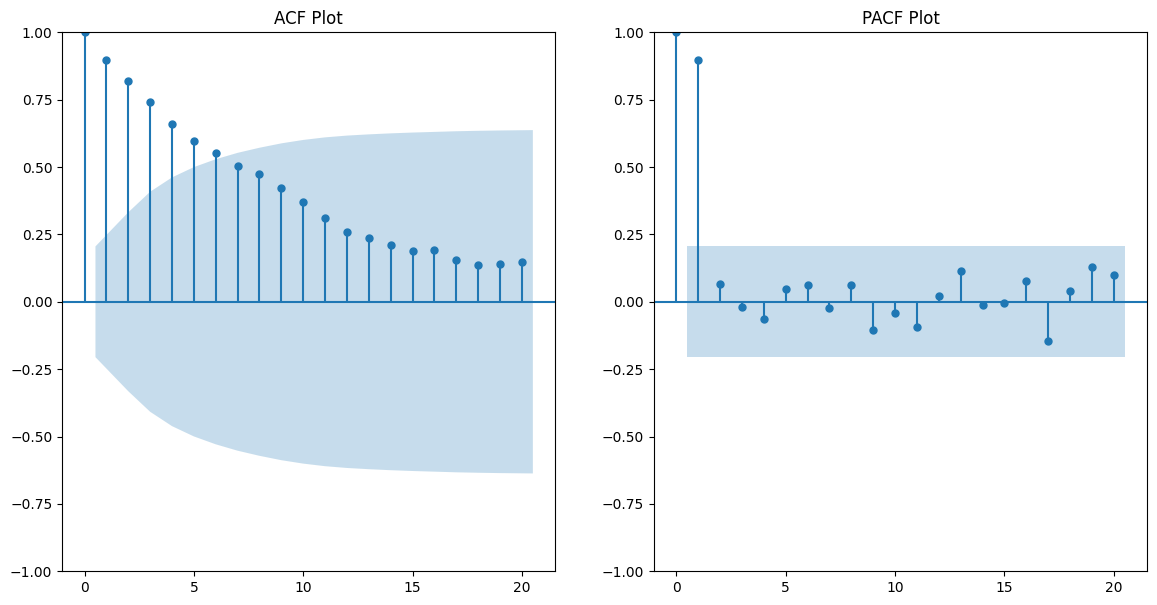

In [28]:
# Plot ACF and PACF
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plot_acf(train['meantemp'], ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(train['meantemp'], ax=plt.gca())
plt.title('PACF Plot')

plt.show()


In [29]:
# Fit the ARIMA model
p, d, q = 2, 1, 2  # Example values, adjust based on analysis
model = ARIMA(train['meantemp'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                   91
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -176.688
Date:                Tue, 08 Oct 2024   AIC                            363.376
Time:                        20:39:40   BIC                            375.875
Sample:                    01-01-2017   HQIC                           368.416
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7729      0.105     16.895      0.000       1.567       1.979
ar.L2         -0.9323      0.101     -9.236      0.000      -1.130      -0.734
ma.L1         -1.8611     24.614     -0.076      0.9

In [30]:
# Forecasting
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Temperature'])


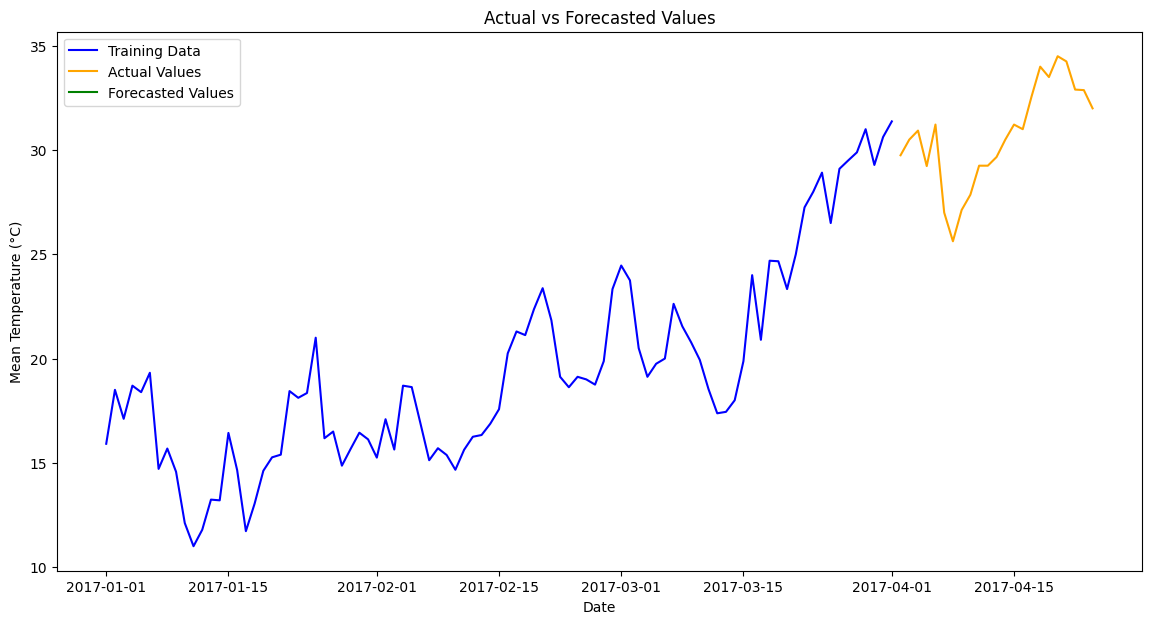

In [31]:
# Plot actual vs forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train['meantemp'], label='Training Data', color='blue')
plt.plot(test['meantemp'], label='Actual Values', color='orange')
plt.plot(forecast_df['Forecasted Temperature'], label='Forecasted Values', color='green')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()


In [32]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['meantemp'], forecast))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Root Mean Squared Error (RMSE): 2.17


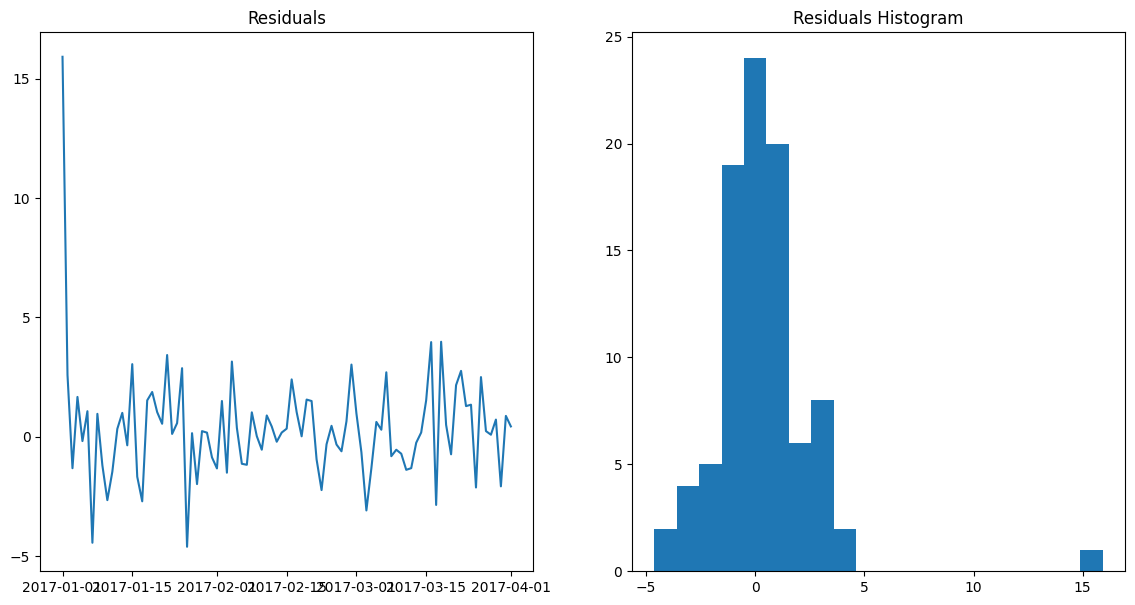

In [33]:
# Analyze residuals
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.show()


Root Mean Squared Error (RMSE): 2.17


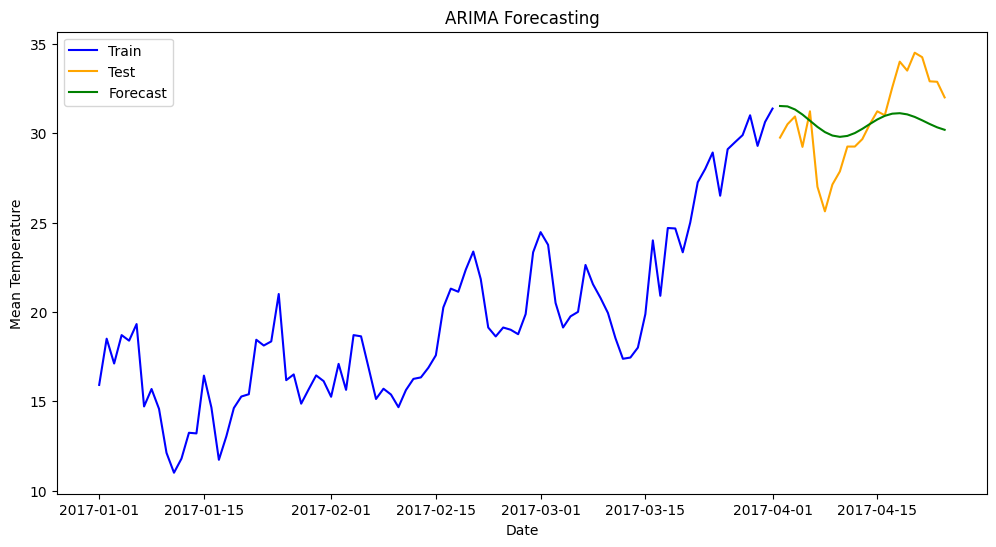

In [47]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


file_path = r'C:\Users\reshm\Documents\Daily Climate time series data\DailyDelhiClimateTest.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Split into training and testing
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit the ARIMA model (example parameters)
model = ARIMA(train['meantemp'], order=(2, 1, 2))  # Replace with optimal (p, d, q) values
model_fit = model.fit()

# Forecasting
n = len(test)  # Forecast for the length of the test set
forecasts = model_fit.forecast(steps=n)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test['meantemp'], forecasts))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train['meantemp'], label='Train', color='blue')
plt.plot(test['meantemp'], label='Test', color='orange')
plt.plot(test.index, forecasts, label='Forecast', color='green')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()


In [48]:

# Assuming you have your test set and predictions from the ARIMA model
test_values = test['meantemp']  # Actual values from the test set
predictions = forecasts  # Predicted values from your ARIMA model

# Calculate Mean Squared Error
mse = mean_squared_error(test_values, predictions)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate Root Mean Squared Error
rmse = mse**0.5
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Squared Error (MSE): 4.73
Root Mean Squared Error (RMSE): 2.17
